In [2]:
!pip install imbalanced-learn


     -------------------------------------- 258.3/258.3 kB 3.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [6]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


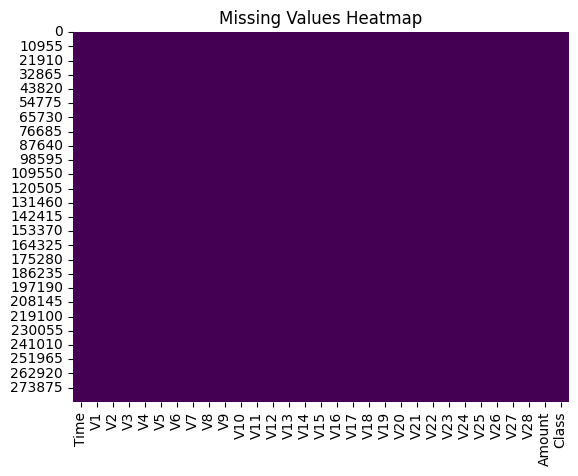

In [7]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


C:\Users\rdube\AppData\Local\Temp\ipykernel_39740\1391648578.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=data, palette=["green", "red"])


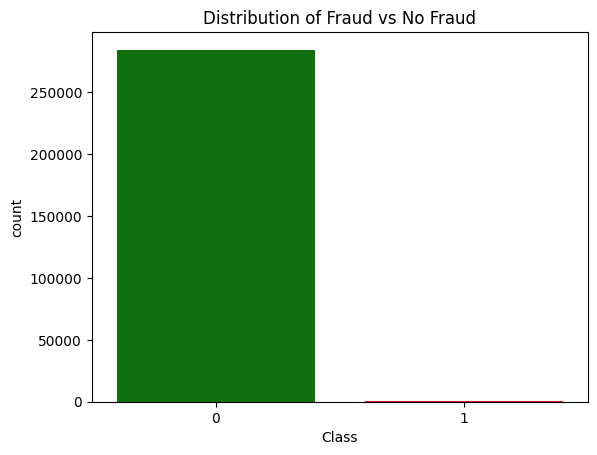

In [8]:
sns.countplot(x="Class", data=data, palette=["green", "red"])
plt.title("Distribution of Fraud vs No Fraud")
plt.show()


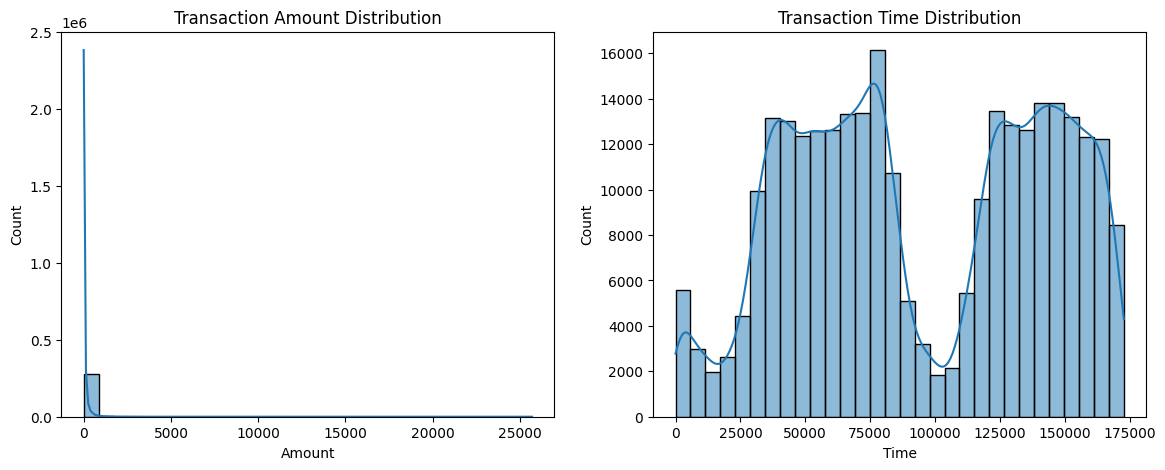

In [9]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(data['Amount'], bins=30, kde=True)
plt.title('Transaction Amount Distribution')

plt.subplot(1,2,2)
sns.histplot(data['Time'], bins=30, kde=True)
plt.title('Transaction Time Distribution')

plt.show()


C:\Users\rdube\AppData\Local\Temp\ipykernel_39740\2965018921.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")


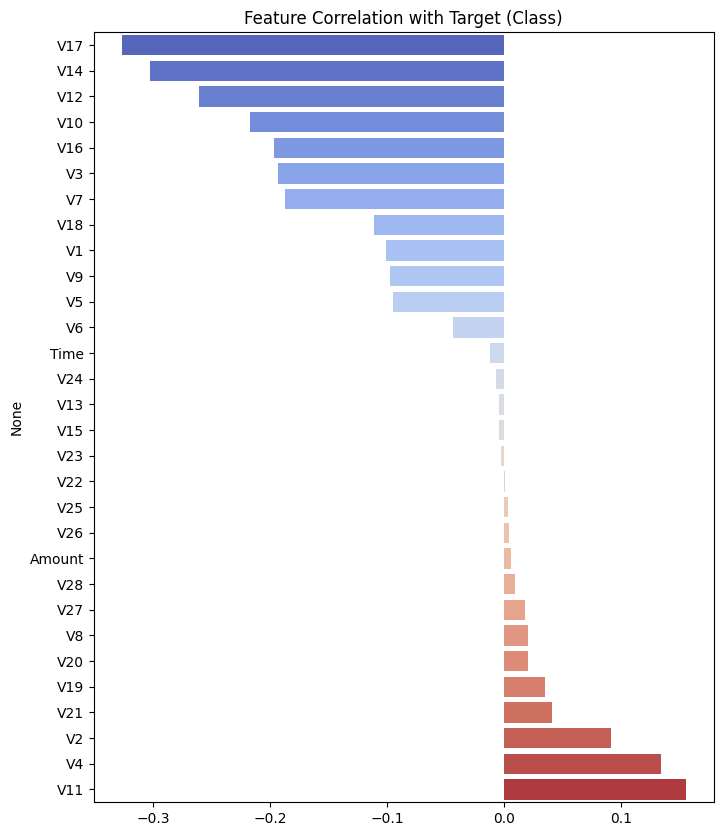

In [10]:
corr = data.corr()['Class'].drop('Class').sort_values()

plt.figure(figsize=(8,10))
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title('Feature Correlation with Target (Class)')
plt.show()


In [11]:
important_features = ['V4','V11','V2','V17','V14','V12','V10','V16','V7','Amount']
X = data[important_features]
y = data['Class']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train, y_train = pipeline.fit_resample(X_train, y_train)


In [14]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title('ROC AUC Curve')
    plt.show()
    
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.2f}")


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.91      0.17        98

    accuracy                           0.98     56962
   macro avg       0.55      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962



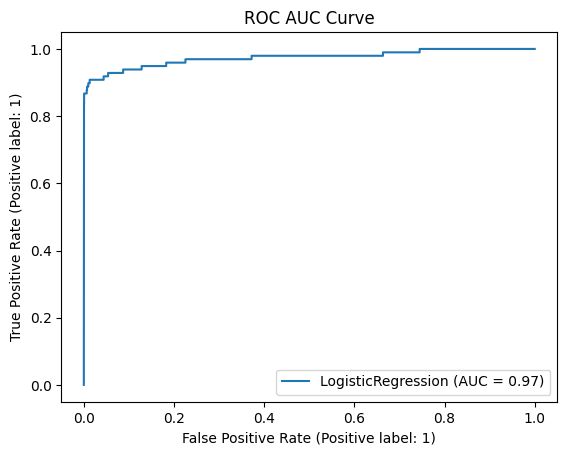

ROC-AUC Score: 0.95


In [15]:
evaluate_model(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test)


In [ ]:
evaluate_model(SVC(kernel='linear'), X_train, y_train, X_test, y_test)


In [ ]:
evaluate_model(DecisionTreeClassifier(max_depth=5), X_train, y_train, X_test, y_test)


In [ ]:
evaluate_model(RandomForestClassifier(n_estimators=100), X_train, y_train, X_test, y_test)


In [ ]:
evaluate_model(KNeighborsClassifier(n_neighbors=5), X_train, y_train, X_test, y_test)
